In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("train.csv")
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN22078,2,0,2,1,Meal Plan 1,0,Room_Type 2,194,2018,7,9,Online,0,0,0,86.62,0,Canceled
1,INN08775,2,0,1,3,Meal Plan 1,0,Room_Type 1,1,2018,5,26,Online,0,0,0,136.18,0,Not_Canceled
2,INN34982,2,0,1,5,Meal Plan 1,0,Room_Type 1,90,2018,9,5,Offline,0,0,0,95.00,3,Not_Canceled
3,INN29744,2,0,1,4,Meal Plan 1,0,Room_Type 1,4,2018,12,28,Online,0,0,0,125.00,1,Not_Canceled
4,INN06466,1,0,0,2,Meal Plan 1,0,Room_Type 4,112,2018,8,17,Online,0,0,0,131.40,0,Canceled


In [5]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.drop(columns=['Booking_ID'] , inplace=True)

In [8]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,Meal Plan 1,0,Room_Type 2,194,2018,7,9,Online,0,0,0,86.62,0,Canceled
1,2,0,1,3,Meal Plan 1,0,Room_Type 1,1,2018,5,26,Online,0,0,0,136.18,0,Not_Canceled
2,2,0,1,5,Meal Plan 1,0,Room_Type 1,90,2018,9,5,Offline,0,0,0,95.00,3,Not_Canceled
3,2,0,1,4,Meal Plan 1,0,Room_Type 1,4,2018,12,28,Online,0,0,0,125.00,1,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 4,112,2018,8,17,Online,0,0,0,131.40,0,Canceled


In [10]:
df.shape

(29020, 18)

In [11]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(7736)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(21284, 18)

In [16]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [17]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15172
Canceled         6112
Name: count, dtype: int64

imbalance datset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21284 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21284 non-null  int64  
 1   no_of_children                        21284 non-null  int64  
 2   no_of_weekend_nights                  21284 non-null  int64  
 3   no_of_week_nights                     21284 non-null  int64  
 4   type_of_meal_plan                     21284 non-null  object 
 5   required_car_parking_space            21284 non-null  int64  
 6   room_type_reserved                    21284 non-null  object 
 7   lead_time                             21284 non-null  int64  
 8   arrival_year                          21284 non-null  int64  
 9   arrival_month                         21284 non-null  int64  
 10  arrival_date                          21284 non-null  int64  
 11  market_segment_type 

In [20]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000,21284.000000
mean,1.885266,0.138085,0.880521,2.252161,0.041581,67.172336,2017.849276,7.334712,15.754041,0.032137,0.027720,0.206023,105.540688,0.735811
std,0.528287,0.455261,0.886798,1.512616,0.199633,69.372410,0.357788,3.138037,8.853391,0.176368,0.396245,2.071362,37.454996,0.813002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,12.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,44.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,100.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,101.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,126.900000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


In [23]:
cat_cols = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations','required_car_parking_space', 'repeated_guest','no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']

## DATA ANALYSIS

In [25]:
data = df.copy()

In [26]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,Meal Plan 1,0,Room_Type 2,194,2018,7,9,Online,0,0,0,86.62,0,Canceled
1,2,0,1,3,Meal Plan 1,0,Room_Type 1,1,2018,5,26,Online,0,0,0,136.18,0,Not_Canceled
2,2,0,1,5,Meal Plan 1,0,Room_Type 1,90,2018,9,5,Offline,0,0,0,95.00,3,Not_Canceled
3,2,0,1,4,Meal Plan 1,0,Room_Type 1,4,2018,12,28,Online,0,0,0,125.00,1,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 4,112,2018,8,17,Online,0,0,0,131.40,0,Canceled


## UNIVARIATE ANALYSIS

In [33]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette='dark' )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette='dark')
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

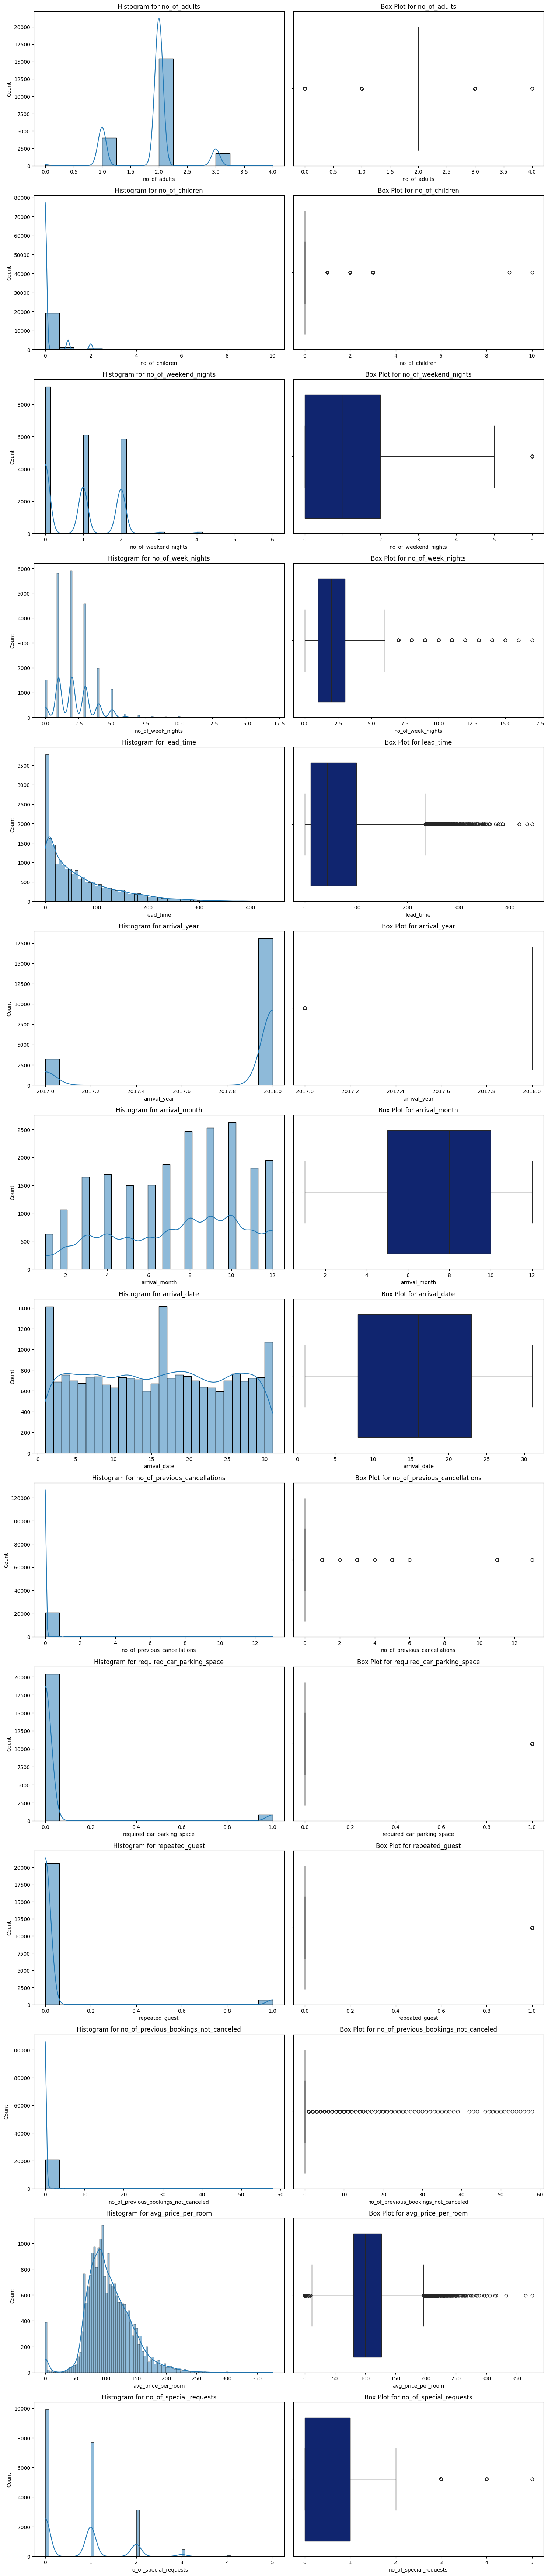

In [34]:
num_plot_dist(data , num_cols)

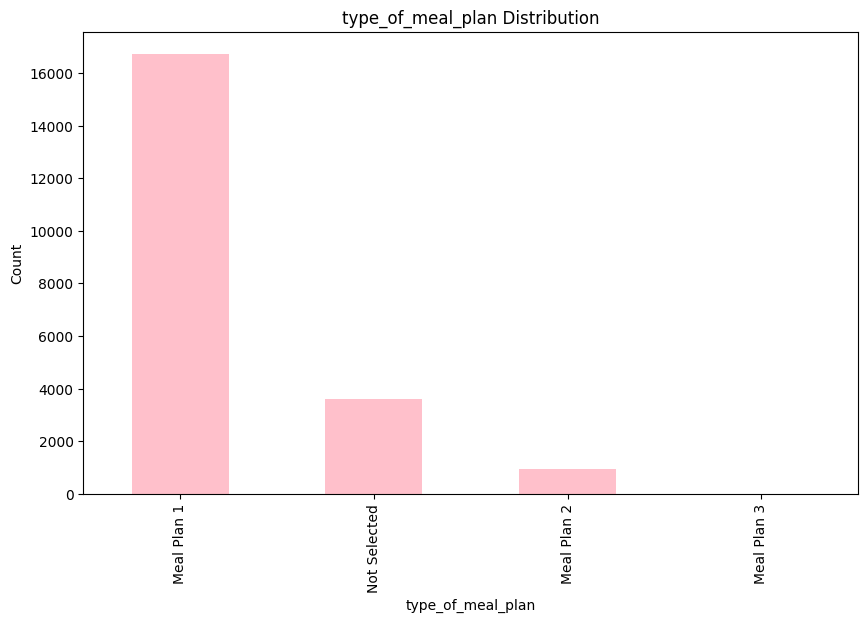

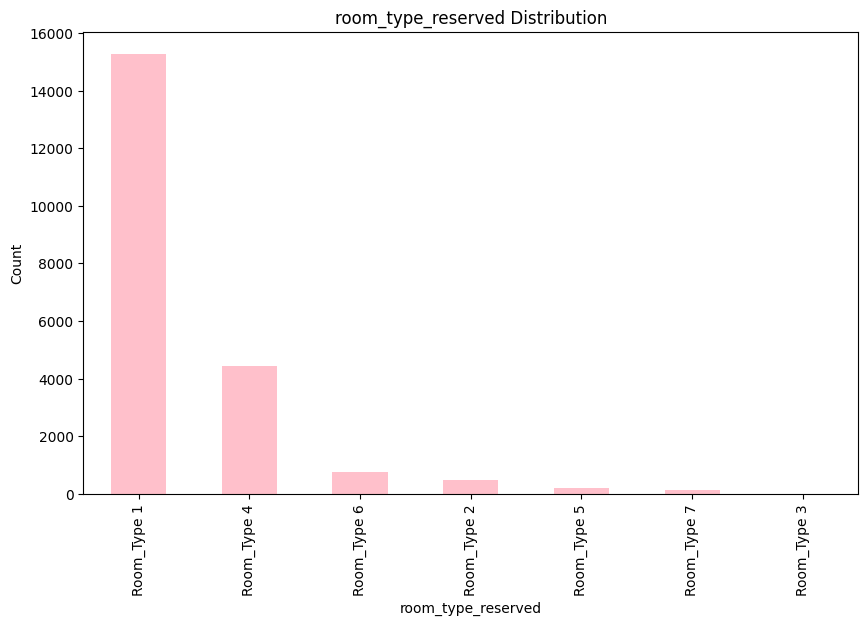

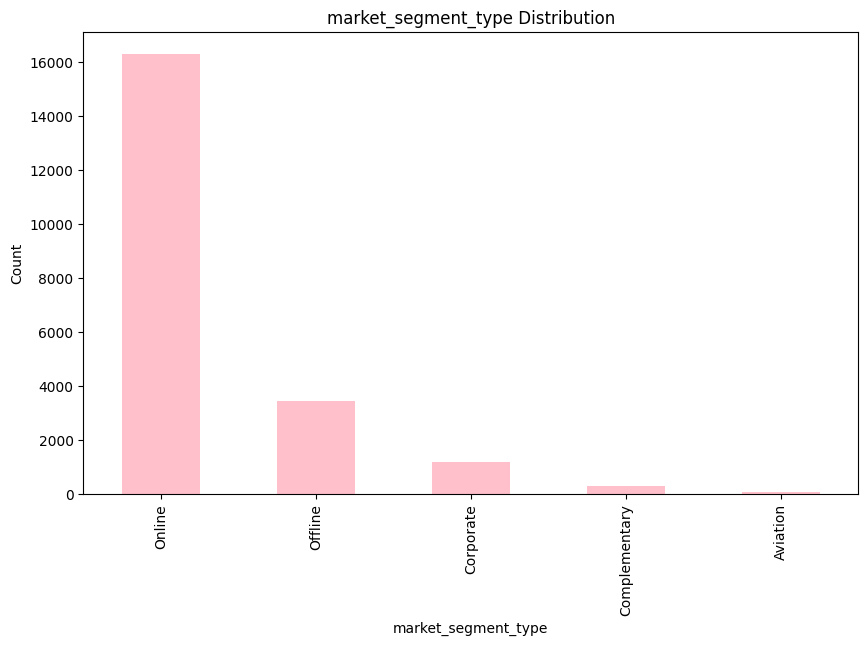

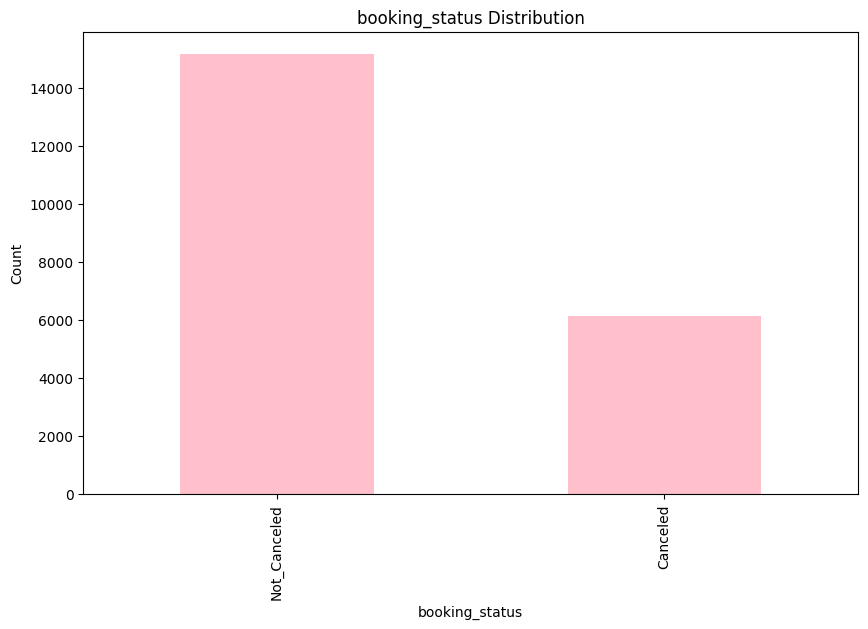

In [37]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='pink')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

BIVARIATE ANALYSIS

In [40]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Colorblind")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

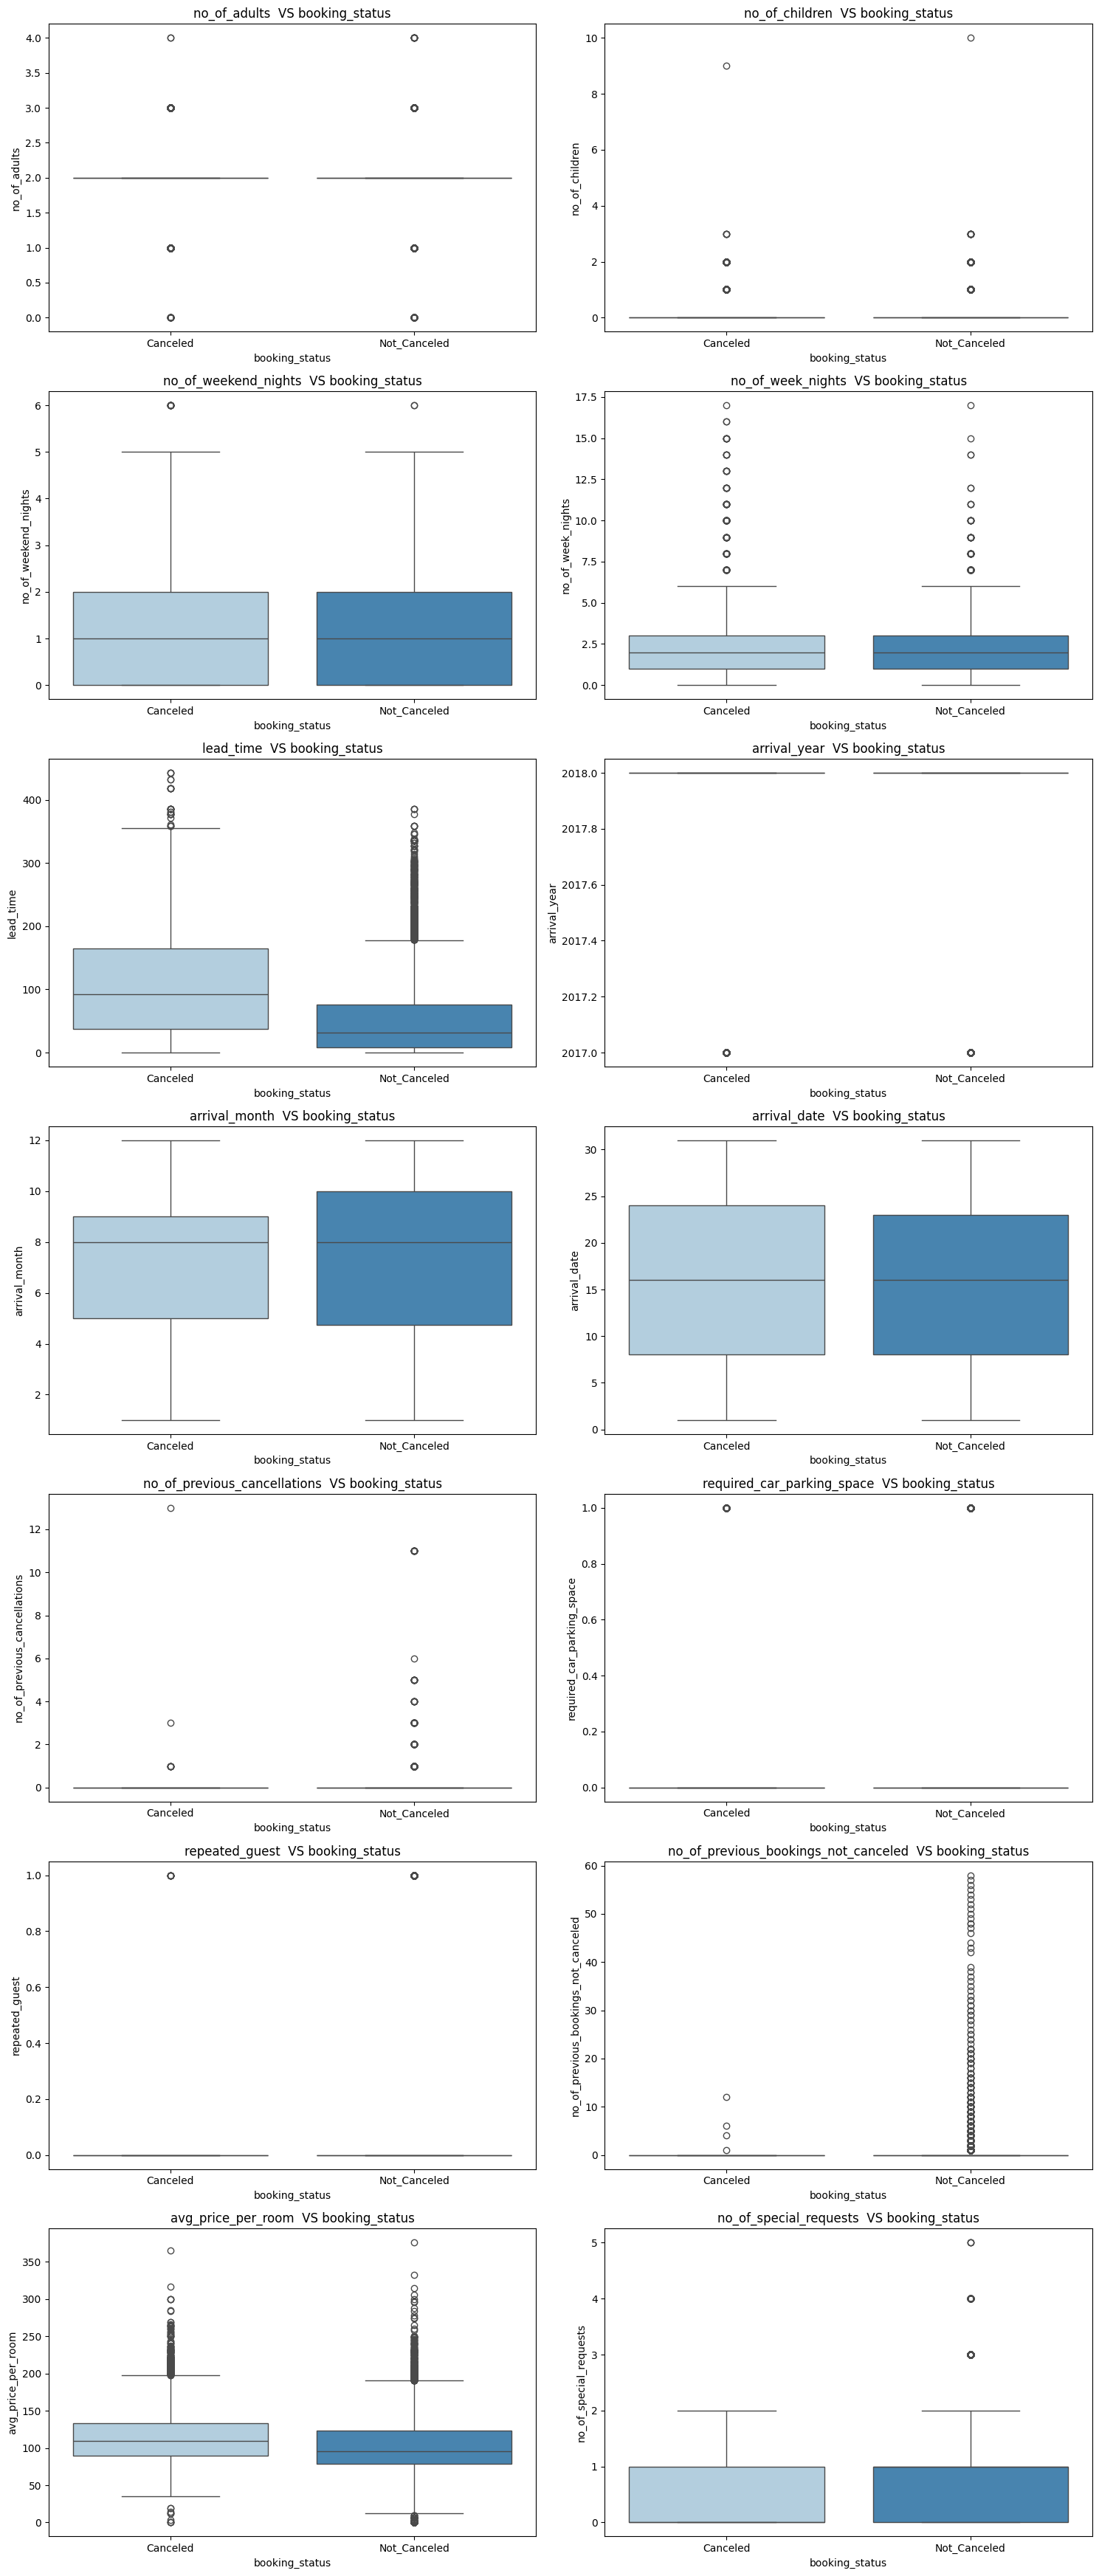

In [39]:
plot_bivariate_num(data , 'booking_status' , num_cols)

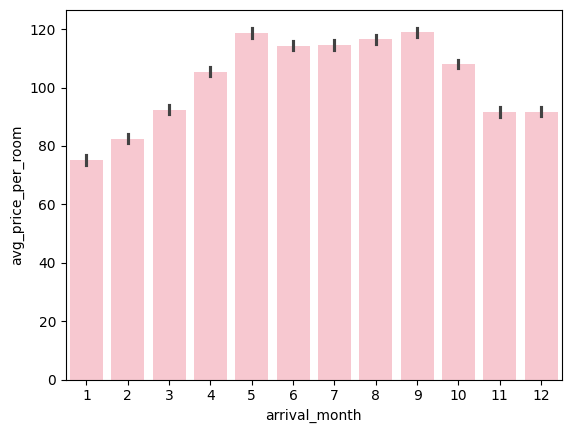

In [42]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data, color = "pink")
plt.show()

In [43]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

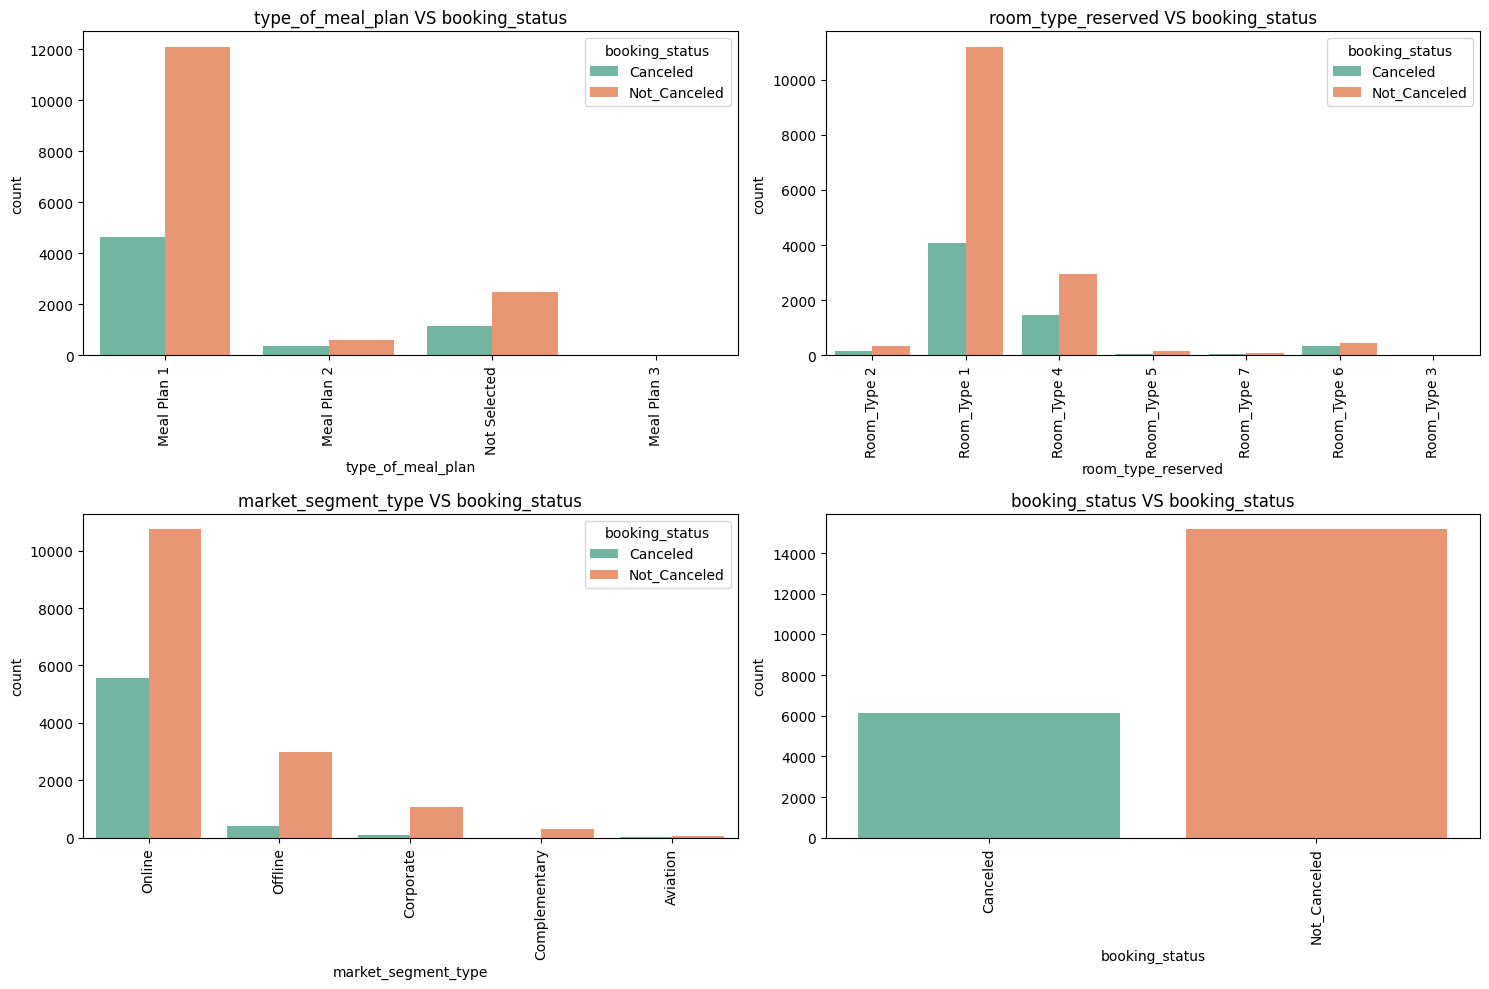

In [44]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

DATA PROCESSING

In [46]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,Meal Plan 1,0,Room_Type 2,194,2018,7,9,Online,0,0,0,86.62,0,Canceled
1,2,0,1,3,Meal Plan 1,0,Room_Type 1,1,2018,5,26,Online,0,0,0,136.18,0,Not_Canceled
2,2,0,1,5,Meal Plan 1,0,Room_Type 1,90,2018,9,5,Offline,0,0,0,95.00,3,Not_Canceled
3,2,0,1,4,Meal Plan 1,0,Room_Type 1,4,2018,12,28,Online,0,0,0,125.00,1,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 4,112,2018,8,17,Online,0,0,0,131.40,0,Canceled


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21284 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21284 non-null  int64  
 1   no_of_children                        21284 non-null  int64  
 2   no_of_weekend_nights                  21284 non-null  int64  
 3   no_of_week_nights                     21284 non-null  int64  
 4   type_of_meal_plan                     21284 non-null  object 
 5   required_car_parking_space            21284 non-null  int64  
 6   room_type_reserved                    21284 non-null  object 
 7   lead_time                             21284 non-null  int64  
 8   arrival_year                          21284 non-null  int64  
 9   arrival_month                         21284 non-null  int64  
 10  arrival_date                          21284 non-null  int64  
 11  market_segment_type 

In [49]:
## LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

In [51]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

### Multicollinearity

In [52]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 4.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 4.7 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 4.8 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.8 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 4.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.8 MB 4.7 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.8 MB 4.9 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.7 MB/s eta 0:00:00


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [55]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [56]:
vif_data

,feature,VIF
0,const,4.097369e+07
1,no_of_adults,1.335360e+00
2,no_of_children,1.282174e+00
3,no_of_weekend_nights,1.077962e+00
4,no_of_week_nights,1.129498e+00
5,type_of_meal_plan,1.176394e+00
6,required_car_parking_space,1.033233e+00
7,room_type_reserved,1.561214e+00
8,lead_time,1.403576e+00
9,arrival_year,1.288064e+00


No multicolinearity found!


In [57]:
corr = df.corr()

In [58]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.038056,0.089084,0.106295,-0.009743,-0.001542,0.277166,0.151675,0.095439,0.002023,0.024546,0.312187,-0.235261,-0.059999,-0.141433,0.326450,0.161125,-0.096765
no_of_children,-0.038056,1.000000,0.008979,0.016027,-0.102962,0.019539,0.359262,0.009442,0.034897,0.003167,0.023266,0.101400,-0.048833,-0.020959,-0.028176,0.354842,0.098059,-0.064560
no_of_weekend_nights,0.089084,0.008979,1.000000,0.234731,-0.038802,-0.051558,0.029787,0.132699,0.029574,0.013747,0.003738,0.090644,-0.086603,-0.028816,-0.036913,-0.006273,0.018845,-0.073220
no_of_week_nights,0.106295,0.016027,0.234731,1.000000,-0.074399,-0.058064,0.081565,0.219710,0.016403,0.028000,-0.002161,0.118869,-0.115798,-0.035024,-0.055452,0.011673,0.034574,-0.124319
type_of_meal_plan,-0.009743,-0.102962,-0.038802,-0.074399,1.000000,-0.019092,-0.249432,-0.052276,0.092078,0.011149,-0.011133,0.182442,-0.069690,-0.012460,-0.044729,-0.102520,-0.007753,-0.034133
required_car_parking_space,-0.001542,0.019539,-0.051558,-0.058064,-0.019092,1.000000,0.015813,-0.041590,0.006177,-0.014117,-0.006283,-0.039186,0.114178,0.034134,0.062343,0.054592,0.068265,0.085905
room_type_reserved,0.277166,0.359262,0.029787,0.081565,-0.249432,0.015813,1.000000,-0.018148,0.088690,-0.002618,0.028594,0.089566,-0.044606,-0.014001,-0.022473,0.491909,0.088353,-0.073035
lead_time,0.151675,0.009442,0.132699,0.219710,-0.052276,-0.041590,-0.018148,1.000000,0.168520,0.133777,0.032537,0.138263,-0.146441,-0.052914,-0.083868,-0.045273,-0.006477,-0.369229
arrival_year,0.095439,0.034897,0.029574,0.016403,0.092078,0.006177,0.088690,0.168520,1.000000,-0.324423,0.011821,0.115342,-0.013332,0.008593,0.023136,0.176440,0.001532,-0.154477
arrival_month,0.002023,0.003167,0.013747,0.028000,0.011149,-0.014117,-0.002618,0.133777,-0.324423,1.000000,-0.019104,-0.022785,-0.005853,-0.040904,-0.004053,0.059766,0.137687,0.016704


<Axes: >

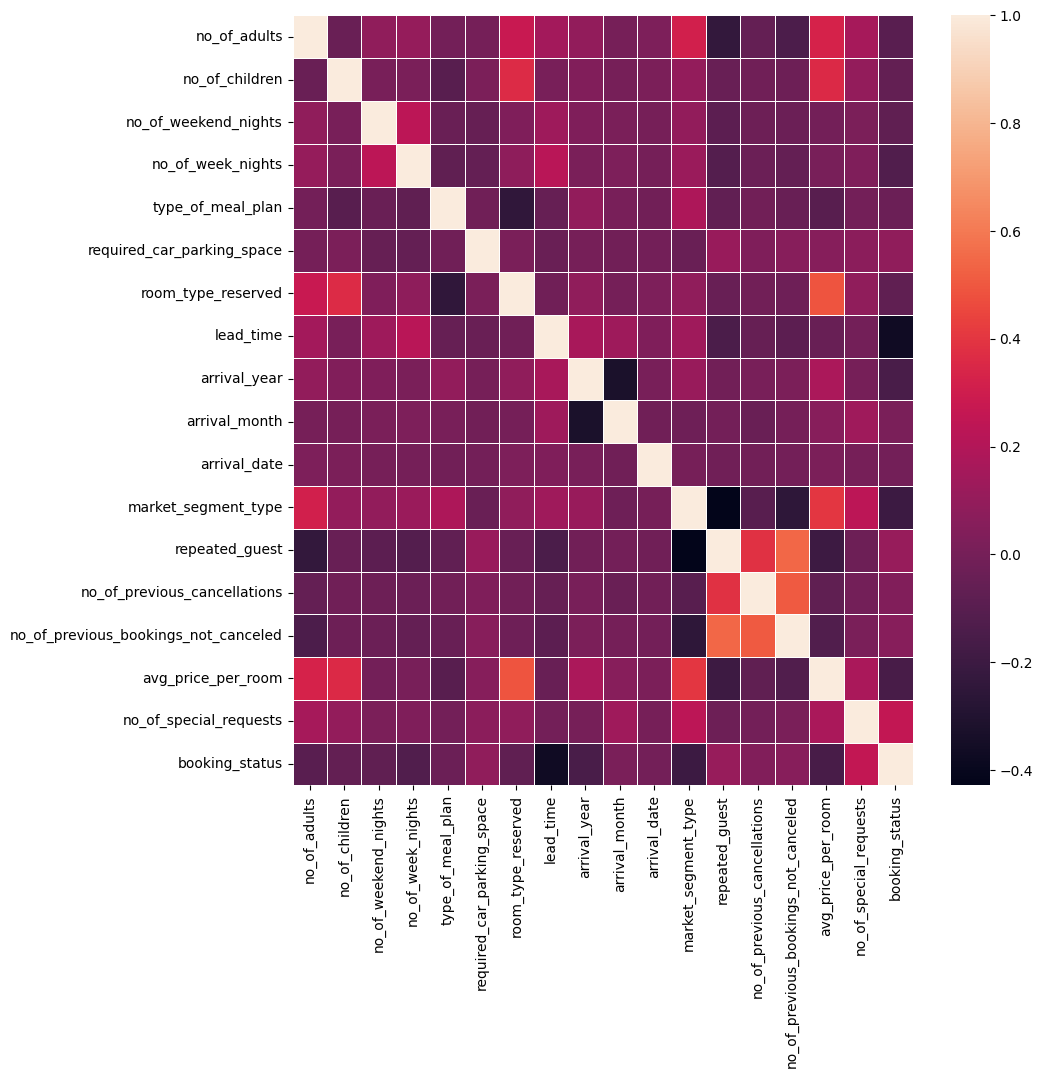

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

SKEWNWSS

In [60]:
skewness  = df.skew()

In [61]:
skewness

no_of_adults                            -0.284722
no_of_children                           3.982788
no_of_weekend_nights                     0.664274
no_of_week_nights                        1.635829
type_of_meal_plan                        1.657230
required_car_parking_space               4.593046
room_type_reserved                       1.373702
lead_time                                1.416412
arrival_year                            -1.952607
arrival_month                           -0.290581
arrival_date                             0.009808
market_segment_type                     -2.347816
repeated_guest                           5.306047
no_of_previous_cancellations            22.155569
no_of_previous_bookings_not_canceled    17.013998
avg_price_per_room                       0.524652
no_of_special_requests                   0.913699
booking_status                          -0.940905
dtype: float64

In [62]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

HANDLING IMBALANCE DATASET

In [63]:
df["booking_status"].value_counts()

booking_status
1    15172
0     6112
Name: count, dtype: int64

In [64]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [65]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [66]:
!pip install imbalanced-learn

In [67]:
y.value_counts()

booking_status
1    15172
0     6112
Name: count, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res , y_res = smote.fit_resample(X,y)
y_res

0        0
1        1
2        1
3        1
4        0
        ..
30339    0
30340    0
30341    0
30342    0
30343    0
Name: booking_status, Length: 30344, dtype: int64

In [69]:
y_res.value_counts()

booking_status
0    15172
1    15172
Name: count, dtype: int64

In [70]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [71]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,0,0,1,194,2018,7,9,4,0.0,0.0,0.0,86.62,0,0
1,2,0,1,3,0,0,0,1,2018,5,26,4,0.0,0.0,0.0,136.18,0,1
2,2,0,1,5,0,0,0,90,2018,9,5,3,0.0,0.0,0.0,95.00,3,1
3,2,0,1,4,0,0,0,4,2018,12,28,4,0.0,0.0,0.0,125.00,1,1
4,1,0,0,2,0,0,3,112,2018,8,17,4,0.0,0.0,0.0,131.40,0,0


In [72]:
balanced_df.shape

(30344, 18)

In [73]:
df = balanced_df.copy()

FEATURE SELECTION


In [74]:
len(df.columns)

18

In [77]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns='booking_status')
y = df["booking_status"]
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [78]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [79]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [80]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [81]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,194,0,86.62,7,9,4,1,2,0,1,0
1,1,0,136.18,5,26,4,3,1,0,0,1
2,90,3,95.00,9,5,3,5,1,0,0,1
3,4,1,125.00,12,28,4,4,1,0,0,1
4,112,0,131.40,8,17,4,2,0,0,3,0


In [82]:
len(top_10_df.columns)

11

In [83]:
df = top_10_df.copy()

MODEL SELECTION

In [84]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 8.5 MB/s eta 0:00:18
   ---------------------------------------- 1.8/150.0 MB 6.3 MB/s eta 0:00:24
    --------------------------------------- 3.1/150.0 MB 6.0 MB/s eta 0:00:25
    --------------------------------------- 3.4/150.0 MB 4.7 MB/s eta 0:00:32
   - -------------------------------------- 4.5/150.0 MB 4.8 MB/s eta 0:00:31
   - -------------------------------------- 5.2/150.0 MB 4.6 MB/s eta 0:00:32
   - -------------------------------------- 6.3/150.0 MB 4.5 MB/s eta 0:00:32
   - -------------------------------------- 7.1/150.0 MB 4.5 MB/s eta 0:00:32
   -- ------------------------------------- 8.1/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 8.9/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 9.7/150.0 MB 4.3 MB/s eta 0:00:33
   -- ------------------------------------- 10.5/150.0 MB 4.2 MB/s eta 

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [86]:
X = df.drop(columns='booking_status')
y = df["booking_status"]
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [87]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [88]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [89]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 12115, number of negative: 12160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24275, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499073 -> initscore=-0.003708
[LightGBM] [Info] Start training from score -0.003708


In [90]:
metrics_df= pd.DataFrame(metrics)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.885484,0.890542,0.880929,0.885710
1,LogisticRegression,0.773604,0.793512,0.744194,0.768062
2,Gradient Boosting,0.834569,0.830596,0.843638,0.837066
3,Suuport vector classifier,0.725985,0.731254,0.720968,0.726075
4,Decsion Tree,0.838029,0.853202,0.819431,0.835975
5,KNN,0.777393,0.850452,0.677134,0.753961
6,Naive Bayes,0.775251,0.808604,0.725548,0.764828
7,XGboost,0.872961,0.873774,0.874060,0.873917
8,Adaboost,0.804745,0.814305,0.793261,0.803645
9,LGBM,0.862416,0.861654,0.865882,0.863762


TRAIN RANDOM FOREST->


In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
X = df.drop(columns='booking_status')
y = df["booking_status"]
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)
rf = RandomForestClassifier(random_state=42)

In [92]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [93]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [94]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.0s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CC5A48EA40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CC70849D80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CC7084A320>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CC5A48F5E0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [95]:
random_search.best_params_
best_rf_model = random_search.best_estimator_

In [96]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [98]:
accuracy

0.862415554457077

In [99]:
precision

0.8616536458333334

In [100]:
recall

0.8658815832515538

In [101]:
f1

0.8637624408549519

SAVE THIS MODEL

In [102]:
import joblib

In [103]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [104]:
loaded_model=joblib.load("random_forest.pkl")
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
25147,178,0,143.62758,8,22,4,2,0,0,3


In [105]:
new_data = np.array([190,1 ,	93.5,	9	,8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [106]:
predictions=loaded_model.predict(new_data)

In [107]:
predictions

array([1])